In [138]:
#reading netcdf file
import xarray as xr
import matplotlib.pyplot as plt
a =xr.open_dataset('/home/sushil/e-p_f/2004/dec/adaptor.mars.internal-1715191754.2126887-6130-3-fffd430b-95f4-44f7-a339-c96873a6d264.nc')

data = a

xr.Dataset(data)



<xarray.Dataset> Size: 548kB
Dimensions:    (longitude: 13, latitude: 7, time: 744)
Coordinates:
  * longitude  (longitude) float32 52B 64.0 64.25 64.5 64.75 ... 66.5 66.75 67.0
  * latitude   (latitude) float32 28B 26.0 25.75 25.5 25.25 25.0 24.75 24.5
  * time       (time) datetime64[ns] 6kB 2004-12-01 ... 2004-12-31T23:00:00
Data variables:
    e          (time, latitude, longitude) float32 271kB ...
    tp         (time, latitude, longitude) float32 271kB ...

In [55]:
#this code to verify the results as it gives values for all dates and time stamps
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of dates
end_dates = [
    '2004-01-13'
]

# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
num_days = 7
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

# Create an empty list to store the results
results = []

# Iterate over each end date
for end_date in end_dates:
    print("Date:", end_date)  
    times = pd.date_range(end=end_date, periods=num_days).strftime('%Y-%m-%d')
    
    # Calculate mean E-P for each day
    for i in range(num_days):
        a = b.sel(time=times[i])
        e_data = a['e'] * 1e+3
        tp_data = a['tp'] * 1e+3
        difference = -e_data - tp_data
        subset = difference.sel(latitude=lat_range, longitude=lon_range)
        mean_e_p = subset.mean(dim=['latitude', 'longitude'])
        
        # Append the results to the list
        results.append({
            'Date': times[i],
            'Mean E-P': mean_e_p.values
        })

# Create a DataFrame from the results list
df = pd.DataFrame(results)

# Convert 'Mean E-P' values to comma-separated strings
df['Mean E-P'] = df['Mean E-P'].apply(lambda x: ', '.join(map(str, x)))

# Display the DataFrame
print(df)

# Save the DataFrame as a CSV file with values separated by commas
df.to_csv('e_p_results.csv', index=False)

Date: 2004-01-13
         Date                                           Mean E-P
0  2004-01-07  0.39475226, 0.40089485, 0.40932378, 0.41561246...
1  2004-01-08  0.3271207, 0.3222035, 0.32669392, 0.33528113, ...
2  2004-01-09  0.1845922, 0.18917672, 0.19734152, 0.20906262,...
3  2004-01-10  0.13206007, 0.12863684, 0.122994564, 0.1134350...
4  2004-01-11  0.0982911, 0.092867725, 0.089581095, 0.0847973...
5  2004-01-12  0.0723563, 0.065134294, 0.058284298, 0.0534895...
6  2004-01-13  0.07799733, 0.07481456, 0.07132771, 0.06953163...


In [33]:
#here we have calculated mean and sd to verify the results for the date 2004-01-13
import numpy as np

data = [0.39475226, 0.40089485, 0.40932378, 0.41561246, 0.41589627, 0.41539395, 0.4220861, 0.43025485, 0.42296672, 0.4048853, 0.3867929, 0.37758806, 0.36801872, 0.35916972, 0.3489213, 0.3433983, 0.34869537, 0.36041212, 0.35998735, 0.32520866, 0.32153115, 0.32565272, 0.33527088, 0.3363904, 0.3271207, 0.3222035, 0.32669392, 0.33528113, 0.33866143, 0.3392972, 0.338452, 0.33792257, 0.32610932, 0.30369306, 0.27820897, 0.25011182, 0.21979563, 0.19529569, 0.17869799, 0.16951716, 0.16429375, 0.16408117, 0.17216802, 0.16881485, 0.17687576, 0.18036313, 0.18157442, 0.18296798, 0.1845922, 0.18917672, 0.19734152, 0.20906262, 0.22113918, 0.22985941, 0.23273702, 0.22362864, 0.21134265, 0.20031911, 0.18836223, 0.17150551, 0.15402879, 0.13727677, 0.1252069, 0.117997885, 0.10908908, 0.10066209, 0.09871861, 0.1041672, 0.107353054, 0.11251821, 0.11807544, 0.12779677, 0.13206007, 0.12863684, 0.122994564, 0.11343503, 0.10370191, 0.10473249, 0.10145768, 0.08341881, 0.08953267, 0.10260124, 0.11159312, 0.111521065, 0.10934889, 0.10896232, 0.10669055, 0.104247905, 0.10134468, 0.101701744, 0.1060839, 0.11801836, 0.11790498, 0.116211474, 0.114777796, 0.10732629, 0.0982911, 0.092867725, 0.089581095, 0.08479738, 0.08052465, 0.07631963, 0.07431907, 0.07018726, 0.07029197, 0.07362584, 0.079502724, 0.082157135, 0.07946572, 0.076444805, 0.07421475, 0.07355302, 0.07240118, 0.0693476, 0.06514099, 0.07122532, 0.07021639, 0.07177488, 0.07474855, 0.07584291, 0.0723563, 0.065134294, 0.058284298, 0.053489577, 0.051754344, 0.05266565, 0.056721102, 0.08676094, 0.09716958, 0.10272682, 0.105726086, 0.10684761, 0.105852045, 0.104639985, 0.10148326, 0.096225984, 0.09081008, 0.08703374, 0.08459071, 0.0960764, 0.096833795, 0.0934523, 0.086996354, 0.08171269, 0.07799733, 0.07481456, 0.07132771, 0.06953163, 0.06815326, 0.06903074, 0.06976163, 0.073383786, 0.06797123, 0.06413717, 0.06147842, 0.06068796, 0.062001195, 0.05863111, 0.052858148, 0.04956916, 0.047721732, 0.045216117, 0.041612994, 0.036604907, 0.0339497, 0.033318672, 0.033929233, 0.034468543]

mean = np.mean(data)
std_dev = np.std(data)

print(f"Mean: {mean:.6f}")
print(f"Standard Deviation: {std_dev:.6f}")

Mean: 0.159154
Standard Deviation: 0.113382


In [22]:
'''import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2004-01-13', '2004-02-04', '2004-03-03', '2004-04-04',
    '2004-05-06', '2004-06-02', '2004-06-30', '2004-07-27',
    '2004-09-11', '2004-10-06', '2004-11-09', '2004-12-11'
]

# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
num_days = 7
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = []  # List to store the results

# Iterate over each start date
for start_date in start_dates:
    print("Date:", start_date)  # Print the start date
    
    times = pd.date_range(end=start_date, periods=num_days).strftime('%Y-%m-%d')
    e_ps = np.zeros(num_days)

    # Calculate mean E-P for each day
    for i in range(num_days):
        a = b.sel(time=times[i])
        e_data_mean = a['e'].mean(dim='time') * 1e+3
        tp_data_mean = a['tp'].mean(dim='time') * 1e+3
        difference_mean = -e_data_mean - tp_data_mean
        subset = difference_mean.sel(latitude=lat_range, longitude=lon_range)
        mean_e_p = subset.mean(dim=['latitude', 'longitude'])
        e_ps[i] = mean_e_p
    
    mean_all = e_ps.mean()
    print("Mean of all resulting mean E-P values:", mean_all)
    
    results.append({'Start Date': start_date, 'Mean E-P': mean_all})  # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('E-P_1', index=False)

Date: 2004-01-13
Mean of all resulting mean E-P values: 0.15915422673736299
Date: 2004-02-04
Mean of all resulting mean E-P values: 0.24461638182401657
Date: 2004-03-03
Mean of all resulting mean E-P values: 0.10040085443428584
Date: 2004-04-04
Mean of all resulting mean E-P values: 0.07332990850721087
Date: 2004-05-06
Mean of all resulting mean E-P values: 0.11642610494579587
Date: 2004-06-02
Mean of all resulting mean E-P values: 0.12377113423177175
Date: 2004-06-30
Mean of all resulting mean E-P values: 0.04953117349318096
Date: 2004-07-27
Mean of all resulting mean E-P values: 0.08894196791308266
Date: 2004-09-11
Mean of all resulting mean E-P values: 0.049432593530842235
Date: 2004-10-06
Mean of all resulting mean E-P values: 0.06859836567725454
Date: 2004-11-09
Mean of all resulting mean E-P values: 0.14186482982976095
Date: 2004-12-11
Mean of all resulting mean E-P values: 0.1645761259964534


In [14]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2004-01-13', '2004-02-04', '2004-03-03', '2004-04-04',
    '2004-05-06', '2004-06-02', '2004-06-30', '2004-07-27',
    '2004-09-11', '2004-10-06', '2004-11-09', '2004-12-11'
]

# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
num_days = 7
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = []  # List to store the results

# Iterate over each start date
for start_date in start_dates:
    print("Date:", start_date)  # Print the start date
    
    times = pd.date_range(end=start_date, periods=num_days).strftime('%Y-%m-%d')
    e = np.zeros(num_days)

    # Calculate mean E-P for each day
    for i in range(num_days):
        a = b.sel(time=times[i])
        e_data_mean = a['e'].mean(dim='time') * 1e+3
        subset = e_data_mean.sel(latitude=lat_range, longitude=lon_range)
        mean_e = subset.mean(dim=['latitude', 'longitude'])
        e[i] = mean_e
    
    mean_all = e.mean()
    print("Mean of all resulting mean E values:", mean_all)
    
    results.append({'Start Date': start_date, 'Mean E': mean_all})  # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('E_1.csv', index=False)

Date: 2004-01-13
Mean of all resulting mean E values: -0.15919266694358417
Date: 2004-02-04
Mean of all resulting mean E values: -0.2689556734902518
Date: 2004-03-03
Mean of all resulting mean E values: -0.10040391662291118
Date: 2004-04-04
Mean of all resulting mean E values: -0.07348551547953061
Date: 2004-05-06
Mean of all resulting mean E values: -0.11648002107228551
Date: 2004-06-02
Mean of all resulting mean E values: -0.12755331184182847
Date: 2004-06-30
Mean of all resulting mean E values: -0.06191988768322127
Date: 2004-07-27
Mean of all resulting mean E values: -0.09763208776712418
Date: 2004-09-11
Mean of all resulting mean E values: -0.054719663092068264
Date: 2004-10-06
Mean of all resulting mean E values: -0.08082203300935882
Date: 2004-11-09
Mean of all resulting mean E values: -0.14186482982976095
Date: 2004-12-11
Mean of all resulting mean E values: -0.16471669503620692


In [15]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2004-01-13', '2004-02-04', '2004-03-03', '2004-04-04',
    '2004-05-06', '2004-06-02', '2004-06-30', '2004-07-27',
    '2004-09-11', '2004-10-06', '2004-11-09', '2004-12-11'
]

# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
num_days = 7
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = []  # List to store the results

# Iterate over each start date
for start_date in start_dates:
    print("Date:", start_date)  # Print the start date
    
    times = pd.date_range(end=start_date, periods=num_days).strftime('%Y-%m-%d')
    tp = np.zeros(num_days)

    # Calculate mean E-P for each day
    for i in range(num_days):
        a = b.sel(time=times[i])
        tp_data_mean = a['tp'].mean(dim='time') * 1e+3
        subset = tp_data_mean.sel(latitude=lat_range, longitude=lon_range)
        mean_tp = subset.mean(dim=['latitude', 'longitude'])
        tp[i] = mean_tp
    
    mean_all = tp.mean()
    print("Mean of all resulting mean P values:", mean_all)
    
    results.append({'Start Date': start_date, 'Mean P': mean_all})  # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('P_1.csv', index=False)

Date: 2004-01-13
Mean of all resulting mean P values: 3.84404205858248e-05
Date: 2004-02-04
Mean of all resulting mean P values: 0.024339295740771507
Date: 2004-03-03
Mean of all resulting mean P values: 3.062080785249626e-06
Date: 2004-04-04
Mean of all resulting mean P values: 0.0001556082491203727
Date: 2004-05-06
Mean of all resulting mean P values: 5.3915363488548405e-05
Date: 2004-06-02
Mean of all resulting mean P values: 0.003782180503809026
Date: 2004-06-30
Mean of all resulting mean P values: 0.012388715254408973
Date: 2004-07-27
Mean of all resulting mean P values: 0.008690118257488524
Date: 2004-09-11
Mean of all resulting mean P values: 0.005287069178718541
Date: 2004-10-06
Mean of all resulting mean P values: 0.012223664895697896
Date: 2004-11-09
Mean of all resulting mean P values: 0.0
Date: 2004-12-11
Mean of all resulting mean P values: 0.00014056985466075794


In [56]:
#this code gives mean and sd

import numpy as np
import xarray as xr
import pandas as pd


# Define the list of start dates
start_dates = [
  '2004-01-13', '2004-02-04', '2004-03-03', '2004-04-04',
  '2004-05-06', '2004-06-02', '2004-06-30', '2004-07-27',
  '2004-09-11', '2004-10-06', '2004-11-09', '2004-12-11'
]


# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
num_days = 7
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = []  # List to store results (including standard deviation)

# Iterate over each start date
for start_date in start_dates:
    print("Date:", start_date)

    times = pd.date_range(end=start_date, periods=num_days).strftime('%Y-%m-%d')
    e_ps = np.zeros(num_days)
    e_ps_sd = []

    # Calculate mean and standard deviation of E-P for each day
    for i in range(num_days):
        a = b.sel(time=times[i])
        e_data_mean = a['e'].mean(dim='time') * 1e+3
        e_data = a['e'] * 1e+3
        tp_data_mean = a['tp'].mean(dim='time') * 1e+3
        tp_data= a['tp'] * 1e+3
        difference_mean = -e_data_mean - tp_data_mean
        difference = -e_data - tp_data
        subset = difference_mean.sel(latitude=lat_range, longitude=lon_range)
        subset_sd = difference.sel(latitude=lat_range, longitude=lon_range)
        mean_e_p = subset.mean(dim=['latitude', 'longitude'])
        mean_subset_sd = subset_sd.mean(dim=['latitude', 'longitude'])
 

        e_ps[i] = mean_e_p
        e_ps_sd.append(mean_subset_sd)
        

    mean_all = e_ps.mean()
    std_dev_all = np.std(e_ps_sd) 
    # Standard deviation of all mean E-P values
   
    print("Mean of all resulting mean E-P values:", mean_all)
    print("Standard deviation of all resulting mean E-P values:", std_dev_all)

    results.append({'Start Date': start_date, 'Mean E-P': mean_all, 'SD E-P': std_dev_all})

# Create a DataFrame from the results
df = pd.DataFrame(results)
df.to_csv('E-P_1w.csv', index=False)


Date: 2004-01-13
Mean of all resulting mean E-P values: 0.15915422673736299
Standard deviation of all resulting mean E-P values: 0.11338162
Date: 2004-02-04
Mean of all resulting mean E-P values: 0.24461638182401657
Standard deviation of all resulting mean E-P values: 0.1526966
Date: 2004-03-03
Mean of all resulting mean E-P values: 0.10040085443428584
Standard deviation of all resulting mean E-P values: 0.020758633
Date: 2004-04-04
Mean of all resulting mean E-P values: 0.07332990850721087
Standard deviation of all resulting mean E-P values: 0.027672984
Date: 2004-05-06
Mean of all resulting mean E-P values: 0.11642610494579587
Standard deviation of all resulting mean E-P values: 0.106751055
Date: 2004-06-02
Mean of all resulting mean E-P values: 0.12377113423177175
Standard deviation of all resulting mean E-P values: 0.03839865
Date: 2004-06-30
Mean of all resulting mean E-P values: 0.04953117349318096
Standard deviation of all resulting mean E-P values: 0.027763298
Date: 2004-07-27


In [6]:
#this code gives mean for one day and not take num day=7
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
  '2004-01-13', '2004-02-04', '2004-03-03', '2004-04-04',
  '2004-05-06', '2004-06-02', '2004-06-30', '2004-07-27',
  '2004-09-11', '2004-10-06', '2004-11-09', '2004-12-11'
]

# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = [] # List to store the results

# Iterate over each start date
for start_date in start_dates:
  print("Date:", start_date) # Print the start date
   
  a = b.sel(time=start_date)
  e_data_mean = a['e'].mean(dim='time') * 1e+3
  tp_data_mean = a['tp'].mean(dim='time') * 1e+3
  difference_mean = -e_data_mean - tp_data_mean
  subset = difference_mean.sel(latitude=lat_range, longitude=lon_range)
  mean_e_p = subset.mean(dim=['latitude', 'longitude'])
  
  print("Mean E-P for the start date:", mean_e_p.values)
   
  results.append({'Start Date': start_date, 'Mean E-P': mean_e_p.values}) # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('E-P_1n', index=False)

Date: 2004-01-13
Mean E-P for the start date: 0.05658987
Date: 2004-02-04
Mean E-P for the start date: 0.19705491
Date: 2004-03-03
Mean E-P for the start date: 0.10203683
Date: 2004-04-04
Mean E-P for the start date: 0.08382058
Date: 2004-05-06
Mean E-P for the start date: 0.07381932
Date: 2004-06-02
Mean E-P for the start date: 0.0781491
Date: 2004-06-30
Mean E-P for the start date: 0.05280217
Date: 2004-07-27
Mean E-P for the start date: 0.10776345
Date: 2004-09-11
Mean E-P for the start date: 0.031665523
Date: 2004-10-06
Mean E-P for the start date: 0.060973573
Date: 2004-11-09
Mean E-P for the start date: 0.10464865
Date: 2004-12-11
Mean E-P for the start date: 0.14953311


In [14]:
'''import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2005-01-10', '2005-02-20', '2005-03-04', '2005-04-05',
    '2005-05-07', '2005-06-08', '2005-07-10', '2005-08-11',
    '2005-09-09', '2005-10-14', '2005-11-08', '2005-12-03'
]

# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
num_days = 7
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = []  # List to store the results

# Iterate over each start date
for start_date in start_dates:
    print("Date:", start_date)  # Print the start date
    
    times = pd.date_range(end=start_date, periods=num_days).strftime('%Y-%m-%d')
    e_ps = np.zeros(num_days)

    # Calculate mean E-P for each day
    for i in range(num_days):
        a = b.sel(time=times[i])
        e_data_mean = a['e'].mean(dim='time') * 1e+3
        tp_data_mean = a['tp'].mean(dim='time') * 1e+3
        difference_mean = -e_data_mean - tp_data_mean
        subset = difference_mean.sel(latitude=lat_range, longitude=lon_range)
        mean_e_p = subset.mean(dim=['latitude', 'longitude'])
        e_ps[i] = mean_e_p
    
    mean_all = e_ps.mean()
    print("Mean of all resulting mean E-P values:", mean_all)
    
    results.append({'Start Date': start_date, 'Mean E-P': mean_all})  # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('E-P_2', index=False)

Date: 2005-01-10
Mean of all resulting mean E-P values: 0.23816746260438645
Date: 2005-02-20
Mean of all resulting mean E-P values: 0.4417296488370214
Date: 2005-03-04
Mean of all resulting mean E-P values: -0.056363314390182495
Date: 2005-04-05
Mean of all resulting mean E-P values: 0.11473123622792107
Date: 2005-05-07
Mean of all resulting mean E-P values: 0.12138897499867848
Date: 2005-06-08
Mean of all resulting mean E-P values: 0.0946497353059905
Date: 2005-07-10
Mean of all resulting mean E-P values: 0.11758095983948026
Date: 2005-08-11
Mean of all resulting mean E-P values: 0.05234647222927639
Date: 2005-09-09
Mean of all resulting mean E-P values: 0.1009134298988751
Date: 2005-10-14
Mean of all resulting mean E-P values: 0.09446410036512784
Date: 2005-11-08
Mean of all resulting mean E-P values: 0.1422074447785105
Date: 2005-12-03
Mean of all resulting mean E-P values: 0.3656819313764572


In [16]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2005-01-10', '2005-02-20', '2005-03-04', '2005-04-05',
    '2005-05-07', '2005-06-08', '2005-07-10', '2005-08-11',
    '2005-09-09', '2005-10-14', '2005-11-08', '2005-12-03'
]

# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
num_days = 7
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = []  # List to store the results

# Iterate over each start date
for start_date in start_dates:
    print("Date:", start_date)  # Print the start date
    
    times = pd.date_range(end=start_date, periods=num_days).strftime('%Y-%m-%d')
    e = np.zeros(num_days)

    # Calculate mean E-P for each day
    for i in range(num_days):
        a = b.sel(time=times[i])
        e_data_mean = a['e'].mean(dim='time') * 1e+3
        subset = e_data_mean.sel(latitude=lat_range, longitude=lon_range)
        mean_e = subset.mean(dim=['latitude', 'longitude'])
        e[i] = mean_e
    
    mean_all = e.mean()
    print("Mean of all resulting mean E values:", mean_all)
    
    results.append({'Start Date': start_date, 'Mean E': mean_all})  # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('E_2.csv', index=False)

Date: 2005-01-10
Mean of all resulting mean E values: -0.2398055557693754
Date: 2005-02-20
Mean of all resulting mean E values: -0.4462637486202376
Date: 2005-03-04
Mean of all resulting mean E values: -0.11315084568091802
Date: 2005-04-05
Mean of all resulting mean E values: -0.11473123622792107
Date: 2005-05-07
Mean of all resulting mean E values: -0.12690244827951705
Date: 2005-06-08
Mean of all resulting mean E values: -0.09651104360818863
Date: 2005-07-10
Mean of all resulting mean E values: -0.12212997462068285
Date: 2005-08-11
Mean of all resulting mean E values: -0.06371138883488518
Date: 2005-09-09
Mean of all resulting mean E values: -0.10178658046892711
Date: 2005-10-14
Mean of all resulting mean E values: -0.09467974784118789
Date: 2005-11-08
Mean of all resulting mean E values: -0.14220988431147166
Date: 2005-12-03
Mean of all resulting mean E values: -0.3656819313764572


In [17]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2005-01-10', '2005-02-20', '2005-03-04', '2005-04-05',
    '2005-05-07', '2005-06-08', '2005-07-10', '2005-08-11',
    '2005-09-09', '2005-10-14', '2005-11-08', '2005-12-03'
]

# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
num_days = 7
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = []  # List to store the results

# Iterate over each start date
for start_date in start_dates:
    print("Date:", start_date)  # Print the start date
    
    times = pd.date_range(end=start_date, periods=num_days).strftime('%Y-%m-%d')
    tp = np.zeros(num_days)

    # Calculate mean E-P for each day
    for i in range(num_days):
        a = b.sel(time=times[i])
        tp_data_mean = a['tp'].mean(dim='time') * 1e+3
        subset = tp_data_mean.sel(latitude=lat_range, longitude=lon_range)
        mean_tp = subset.mean(dim=['latitude', 'longitude'])
        tp[i] = mean_tp
    
    mean_all = tp.mean()
    print("Mean of all resulting mean P values:", mean_all)
    
    results.append({'Start Date': start_date, 'Mean P': mean_all})  # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('P_2.csv', index=False)

Date: 2005-01-10
Mean of all resulting mean P values: 0.0016380866706770445
Date: 2005-02-20
Mean of all resulting mean P values: 0.0045341076994580886
Date: 2005-03-04
Mean of all resulting mean P values: 0.1695141472654151
Date: 2005-04-05
Mean of all resulting mean P values: 0.0
Date: 2005-05-07
Mean of all resulting mean P values: 0.00551347495482852
Date: 2005-06-08
Mean of all resulting mean P values: 0.0018613085326251166
Date: 2005-07-10
Mean of all resulting mean P values: 0.004549018423339086
Date: 2005-08-11
Mean of all resulting mean P values: 0.011364919732191734
Date: 2005-09-09
Mean of all resulting mean P values: 0.0008731465578810978
Date: 2005-10-14
Mean of all resulting mean P values: 0.00021564782780306553
Date: 2005-11-08
Mean of all resulting mean P values: 2.4398711307834934e-06
Date: 2005-12-03
Mean of all resulting mean P values: 0.0


In [9]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2005-01-10', '2005-02-20', '2005-03-04', '2005-04-05',
    '2005-05-07', '2005-06-08', '2005-07-10', '2005-08-11',
    '2005-09-09', '2005-10-14', '2005-11-08', '2005-12-03'
]

# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = []  # List to store the results

# Iterate over each start date
for start_date in start_dates:
    print("Date:", start_date)  # Print the start date
    
    a = b.sel(time=start_date)
    e_data_mean = a['e'].mean(dim='time') * 1e+3
    tp_data_mean = a['tp'].mean(dim='time') * 1e+3
    difference_mean = -e_data_mean - tp_data_mean
    subset = difference_mean.sel(latitude=lat_range, longitude=lon_range)
    mean_e_p = subset.mean(dim=['latitude', 'longitude'])
    
    print("Mean E-P for the start date:", mean_e_p.values)
    
    results.append({'Start Date': start_date, 'Mean E-P': mean_e_p.values})  # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('E-P_2n', index=False)

Date: 2005-01-10
Mean E-P for the start date: 0.45201865
Date: 2005-02-20
Mean E-P for the start date: 0.23833072
Date: 2005-03-04
Mean E-P for the start date: 0.15608132
Date: 2005-04-05
Mean E-P for the start date: 0.13162036
Date: 2005-05-07
Mean E-P for the start date: 0.16585879
Date: 2005-06-08
Mean E-P for the start date: 0.031085372
Date: 2005-07-10
Mean E-P for the start date: 0.12725522
Date: 2005-08-11
Mean E-P for the start date: 0.045537606
Date: 2005-09-09
Mean E-P for the start date: 0.08696238
Date: 2005-10-14
Mean E-P for the start date: 0.09027988
Date: 2005-11-08
Mean E-P for the start date: 0.13000312
Date: 2005-12-03
Mean E-P for the start date: 0.20389326


In [15]:
'''import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2006-01-06', '2006-02-07', '2006-02-28', '2006-04-01',
    '2006-05-03', '2006-06-08', '2006-07-17', '2006-08-30',
    '2006-09-12', '2006-10-05', '2006-11-01', '2006-12-17'
]

# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
num_days = 7
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = []  # List to store the results

# Iterate over each start date
for start_date in start_dates:
    print("Date:", start_date)  # Print the start date
    
    times = pd.date_range(end=start_date, periods=num_days).strftime('%Y-%m-%d')
    e_ps = np.zeros(num_days)

    # Calculate mean E-P for each day
    for i in range(num_days):
        a = b.sel(time=times[i])
        e_data_mean = a['e'].mean(dim='time') * 1e+3
        tp_data_mean = a['tp'].mean(dim='time') * 1e+3
        difference_mean = -e_data_mean - tp_data_mean
        subset = difference_mean.sel(latitude=lat_range, longitude=lon_range)
        mean_e_p = subset.mean(dim=['latitude', 'longitude'])
        e_ps[i] = mean_e_p
    
    mean_all = e_ps.mean()
    print("Mean of all resulting mean E-P values:", mean_all)
    
    results.append({'Start Date': start_date, 'Mean E-P': mean_all})  # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('E-P_3', index=False)

Date: 2006-01-06
Mean of all resulting mean E-P values: 0.43327343463897705
Date: 2006-02-07
Mean of all resulting mean E-P values: 0.08999190905264445
Date: 2006-02-28
Mean of all resulting mean E-P values: 0.17278300438608443
Date: 2006-04-01
Mean of all resulting mean E-P values: 0.149082784141813
Date: 2006-05-03
Mean of all resulting mean E-P values: 0.08523795860154289
Date: 2006-06-08
Mean of all resulting mean E-P values: 0.040196893204535754
Date: 2006-07-17
Mean of all resulting mean E-P values: 0.07971430782760892
Date: 2006-08-30
Mean of all resulting mean E-P values: 0.10414102779967445
Date: 2006-09-12
Mean of all resulting mean E-P values: 0.07241014444402286
Date: 2006-10-05
Mean of all resulting mean E-P values: 0.12601424327918462
Date: 2006-11-01
Mean of all resulting mean E-P values: 0.11138204272304263
Date: 2006-12-17
Mean of all resulting mean E-P values: 0.22268589266708919


In [18]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2006-01-06', '2006-02-07', '2006-02-28', '2006-04-01',
    '2006-05-03', '2006-06-08', '2006-07-17', '2006-08-30',
    '2006-09-12', '2006-10-05', '2006-11-01', '2006-12-17'
]


# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
num_days = 7
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = []  # List to store the results

# Iterate over each start date
for start_date in start_dates:
    print("Date:", start_date)  # Print the start date
    
    times = pd.date_range(end=start_date, periods=num_days).strftime('%Y-%m-%d')
    e = np.zeros(num_days)

    # Calculate mean E-P for each day
    for i in range(num_days):
        a = b.sel(time=times[i])
        e_data_mean = a['e'].mean(dim='time') * 1e+3
        subset = e_data_mean.sel(latitude=lat_range, longitude=lon_range)
        mean_e = subset.mean(dim=['latitude', 'longitude'])
        e[i] = mean_e
    
    mean_all = e.mean()
    print("Mean of all resulting mean E values:", mean_all)
    
    results.append({'Start Date': start_date, 'Mean E': mean_all})  # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('E_3.csv', index=False)

Date: 2006-01-06
Mean of all resulting mean E values: -0.44052791595458984
Date: 2006-02-07
Mean of all resulting mean E values: -0.09000491776636668
Date: 2006-02-28
Mean of all resulting mean E values: -0.17317961369241988
Date: 2006-04-01
Mean of all resulting mean E values: -0.149082784141813
Date: 2006-05-03
Mean of all resulting mean E values: -0.08564044428723198
Date: 2006-06-08
Mean of all resulting mean E values: -0.046961824276617596
Date: 2006-07-17
Mean of all resulting mean E values: -0.08632899554712432
Date: 2006-08-30
Mean of all resulting mean E values: -0.11643133046371597
Date: 2006-09-12
Mean of all resulting mean E values: -0.07537286089999336
Date: 2006-10-05
Mean of all resulting mean E values: -0.12856940499373845
Date: 2006-11-01
Mean of all resulting mean E values: -0.11142464407852717
Date: 2006-12-17
Mean of all resulting mean E values: -0.22269023954868317


In [19]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2006-01-06', '2006-02-07', '2006-02-28', '2006-04-01',
    '2006-05-03', '2006-06-08', '2006-07-17', '2006-08-30',
    '2006-09-12', '2006-10-05', '2006-11-01', '2006-12-17'
]

# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
num_days = 7
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = []  # List to store the results

# Iterate over each start date
for start_date in start_dates:
    print("Date:", start_date)  # Print the start date
    
    times = pd.date_range(end=start_date, periods=num_days).strftime('%Y-%m-%d')
    tp = np.zeros(num_days)

    # Calculate mean E-P for each day
    for i in range(num_days):
        a = b.sel(time=times[i])
        tp_data_mean = a['tp'].mean(dim='time') * 1e+3
        subset = tp_data_mean.sel(latitude=lat_range, longitude=lon_range)
        mean_tp = subset.mean(dim=['latitude', 'longitude'])
        tp[i] = mean_tp
    
    mean_all = tp.mean()
    print("Mean of all resulting mean P values:", mean_all)
    
    results.append({'Start Date': start_date, 'Mean P': mean_all})  # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('P_3.csv', index=False)

Date: 2006-01-06
Mean of all resulting mean P values: 0.007254479719059808
Date: 2006-02-07
Mean of all resulting mean P values: 1.30082577608651e-05
Date: 2006-02-28
Mean of all resulting mean P values: 0.0003965991542957324
Date: 2006-04-01
Mean of all resulting mean P values: 0.0
Date: 2006-05-03
Mean of all resulting mean P values: 0.0004024883164674975
Date: 2006-06-08
Mean of all resulting mean P values: 0.006764932169712016
Date: 2006-07-17
Mean of all resulting mean P values: 0.0066146882932766205
Date: 2006-08-30
Mean of all resulting mean P values: 0.01229030146662678
Date: 2006-09-12
Mean of all resulting mean P values: 0.002962715638984394
Date: 2006-10-05
Mean of all resulting mean P values: 0.0025551626521129428
Date: 2006-11-01
Mean of all resulting mean P values: 4.2602001485647634e-05
Date: 2006-12-17
Mean of all resulting mean P values: 4.347557998179192e-06


In [11]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2006-01-06', '2006-02-07', '2006-02-28', '2006-04-01',
    '2006-05-03', '2006-06-08', '2006-07-17', '2006-08-30',
    '2006-09-12', '2006-10-05', '2006-11-01', '2006-12-17'
]

# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = [] # List to store the results

# Iterate over each start date
for start_date in start_dates:
  print("Date:", start_date) # Print the start date
   
  a = b.sel(time=start_date)
  e_data_mean = a['e'].mean(dim='time') * 1e+3
  tp_data_mean = a['tp'].mean(dim='time') * 1e+3
  difference_mean = -e_data_mean - tp_data_mean
  subset = difference_mean.sel(latitude=lat_range, longitude=lon_range)
  mean_e_p = subset.mean(dim=['latitude', 'longitude'])
  
  print("Mean E-P for the start date:", mean_e_p.values)
   
  results.append({'Start Date': start_date, 'Mean E-P': mean_e_p.values}) # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('E-P_3n', index=False)

Date: 2006-01-06
Mean E-P for the start date: 0.35833874
Date: 2006-02-07
Mean E-P for the start date: 0.07757761
Date: 2006-02-28
Mean E-P for the start date: 0.11586821
Date: 2006-04-01
Mean E-P for the start date: 0.17564254
Date: 2006-05-03
Mean E-P for the start date: 0.07186431
Date: 2006-06-08
Mean E-P for the start date: 0.0659625
Date: 2006-07-17
Mean E-P for the start date: 0.062543586
Date: 2006-08-30
Mean E-P for the start date: 0.044168454
Date: 2006-09-12
Mean E-P for the start date: 0.068545215
Date: 2006-10-05
Mean E-P for the start date: 0.08752977
Date: 2006-11-01
Mean E-P for the start date: 0.08064291
Date: 2006-12-17
Mean E-P for the start date: 0.16753246


In [20]:
'''import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2018-01-02', '2018-02-15', '2018-03-05', '2018-04-06', '2018-05-04',
    '2018-06-05', '2018-07-07', '2018-08-15', '2018-09-04', '2018-10-06',
    '2018-11-07', '2018-12-18'
]
# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
num_days = 7
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = []  # List to store the results

# Iterate over each start date
for start_date in start_dates:
    print("Date:", start_date)  # Print the start date
    
    times = pd.date_range(end=start_date, periods=num_days).strftime('%Y-%m-%d')
    e_ps = np.zeros(num_days)

    # Calculate mean E-P for each day
    for i in range(num_days):
        a = b.sel(time=times[i])
        e_data_mean = a['e'].mean(dim='time') * 1e+3
        tp_data_mean = a['tp'].mean(dim='time') * 1e+3
        difference_mean = -e_data_mean - tp_data_mean
        subset = difference_mean.sel(latitude=lat_range, longitude=lon_range)
        mean_e_p = subset.mean(dim=['latitude', 'longitude'])
        e_ps[i] = mean_e_p
    
    mean_all = e_ps.mean()
    print("Mean of all resulting mean E-P values:", mean_all)
    
    results.append({'Start Date': start_date, 'Mean E-P': mean_all})  # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('E-P_4', index=False)

Date: 2018-01-02
Mean of all resulting mean E-P values: 0.1324708823646818
Date: 2018-02-15
Mean of all resulting mean E-P values: 0.10682152211666107
Date: 2018-03-05
Mean of all resulting mean E-P values: 0.1007097384759358
Date: 2018-04-06
Mean of all resulting mean E-P values: 0.08553271474582809
Date: 2018-05-04
Mean of all resulting mean E-P values: 0.10826635573591505
Date: 2018-06-05
Mean of all resulting mean E-P values: 0.1112807568694864
Date: 2018-07-07
Mean of all resulting mean E-P values: 0.17788261494466237
Date: 2018-08-15
Mean of all resulting mean E-P values: 0.058858822765094895
Date: 2018-09-04
Mean of all resulting mean E-P values: 0.0838365379188742
Date: 2018-10-06
Mean of all resulting mean E-P values: 0.06557337513991765
Date: 2018-11-07
Mean of all resulting mean E-P values: 0.259895669562476
Date: 2018-12-18
Mean of all resulting mean E-P values: 0.32291202885763987


In [20]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2018-01-02', '2018-02-15', '2018-03-05', '2018-04-06', '2018-05-04',
    '2018-06-05', '2018-07-07', '2018-08-15', '2018-09-04', '2018-10-06',
    '2018-11-07', '2018-12-18'
]



# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
num_days = 7
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = []  # List to store the results

# Iterate over each start date
for start_date in start_dates:
    print("Date:", start_date)  # Print the start date
    
    times = pd.date_range(end=start_date, periods=num_days).strftime('%Y-%m-%d')
    e = np.zeros(num_days)

    # Calculate mean E-P for each day
    for i in range(num_days):
        a = b.sel(time=times[i])
        e_data_mean = a['e'].mean(dim='time') * 1e+3
        subset = e_data_mean.sel(latitude=lat_range, longitude=lon_range)
        mean_e = subset.mean(dim=['latitude', 'longitude'])
        e[i] = mean_e
    
    mean_all = e.mean()
    print("Mean of all resulting mean E values:", mean_all)
    
    results.append({'Start Date': start_date, 'Mean E': mean_all})  # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('E_4.csv', index=False)

Date: 2018-01-02
Mean of all resulting mean E values: -0.13247146138123103
Date: 2018-02-15
Mean of all resulting mean E values: -0.11262276768684387
Date: 2018-03-05
Mean of all resulting mean E values: -0.10077813161270958
Date: 2018-04-06
Mean of all resulting mean E values: -0.08554943331650325
Date: 2018-05-04
Mean of all resulting mean E values: -0.1082664148083755
Date: 2018-06-05
Mean of all resulting mean E values: -0.1122873058276517
Date: 2018-07-07
Mean of all resulting mean E values: -0.19217570232493536
Date: 2018-08-15
Mean of all resulting mean E values: -0.06781518406101636
Date: 2018-09-04
Mean of all resulting mean E values: -0.08991780238492149
Date: 2018-10-06
Mean of all resulting mean E values: -0.06568319882665362
Date: 2018-11-07
Mean of all resulting mean E values: -0.259895669562476
Date: 2018-12-18
Mean of all resulting mean E values: -0.3232901841402054


In [21]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2018-01-02', '2018-02-15', '2018-03-05', '2018-04-06', '2018-05-04',
    '2018-06-05', '2018-07-07', '2018-08-15', '2018-09-04', '2018-10-06',
    '2018-11-07', '2018-12-18'
]

# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
num_days = 7
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = []  # List to store the results

# Iterate over each start date
for start_date in start_dates:
    print("Date:", start_date)  # Print the start date
    
    times = pd.date_range(end=start_date, periods=num_days).strftime('%Y-%m-%d')
    tp = np.zeros(num_days)

    # Calculate mean E-P for each day
    for i in range(num_days):
        a = b.sel(time=times[i])
        tp_data_mean = a['tp'].mean(dim='time') * 1e+3
        subset = tp_data_mean.sel(latitude=lat_range, longitude=lon_range)
        mean_tp = subset.mean(dim=['latitude', 'longitude'])
        tp[i] = mean_tp
    
    mean_all = tp.mean()
    print("Mean of all resulting mean P values:", mean_all)
    
    results.append({'Start Date': start_date, 'Mean P': mean_all})  # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('P_4.csv', index=False)

Date: 2018-01-02
Mean of all resulting mean P values: 5.796945775468235e-07
Date: 2018-02-15
Mean of all resulting mean P values: 0.005801244401871892
Date: 2018-03-05
Mean of all resulting mean P values: 6.839374223740638e-05
Date: 2018-04-06
Mean of all resulting mean P values: 1.6718881462501095e-05
Date: 2018-05-04
Mean of all resulting mean P values: 5.8467516542545384e-08
Date: 2018-06-05
Mean of all resulting mean P values: 0.0010065505170392239
Date: 2018-07-07
Mean of all resulting mean P values: 0.014293088877041425
Date: 2018-08-15
Mean of all resulting mean P values: 0.008956360763737134
Date: 2018-09-04
Mean of all resulting mean P values: 0.006081264100170561
Date: 2018-10-06
Mean of all resulting mean P values: 0.00010982527344692374
Date: 2018-11-07
Mean of all resulting mean P values: 0.0
Date: 2018-12-18
Mean of all resulting mean P values: 0.0003781519626500085


In [12]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2018-01-02', '2018-02-15', '2018-03-05', '2018-04-06', '2018-05-04',
    '2018-06-05', '2018-07-07', '2018-08-15', '2018-09-04', '2018-10-06',
    '2018-11-07', '2018-12-18'
]

# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = [] # List to store the results

# Iterate over each start date
for start_date in start_dates:
  print("Date:", start_date) # Print the start date
   
  a = b.sel(time=start_date)
  e_data_mean = a['e'].mean(dim='time') * 1e+3
  tp_data_mean = a['tp'].mean(dim='time') * 1e+3
  difference_mean = -e_data_mean - tp_data_mean
  subset = difference_mean.sel(latitude=lat_range, longitude=lon_range)
  mean_e_p = subset.mean(dim=['latitude', 'longitude'])
  
  print("Mean E-P for the start date:", mean_e_p.values)
   
  results.append({'Start Date': start_date, 'Mean E-P': mean_e_p.values}) # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('E-P_4n', index=False)

Date: 2018-01-02
Mean E-P for the start date: 0.13220085
Date: 2018-02-15
Mean E-P for the start date: 0.09767083
Date: 2018-03-05
Mean E-P for the start date: 0.099440955
Date: 2018-04-06
Mean E-P for the start date: 0.06090233
Date: 2018-05-04
Mean E-P for the start date: 0.09455591
Date: 2018-06-05
Mean E-P for the start date: 0.10142877
Date: 2018-07-07
Mean E-P for the start date: 0.17835702
Date: 2018-08-15
Mean E-P for the start date: 0.070950486
Date: 2018-09-04
Mean E-P for the start date: 0.09523767
Date: 2018-10-06
Mean E-P for the start date: 0.06955826
Date: 2018-11-07
Mean E-P for the start date: 0.16546991
Date: 2018-12-18
Mean E-P for the start date: 0.20459425


In [17]:
'''import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2019-01-23', '2019-02-08', '2019-03-06', '2019-03-31', '2019-05-07',
    '2019-06-03', '2019-06-26', '2019-08-02', '2019-09-07', '2019-10-07',
    '2019-11-01', '2019-12-01'
]
# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
num_days = 7
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = []  # List to store the results

# Iterate over each start date
for start_date in start_dates:
    print("Date:", start_date)  # Print the start date
    
    times = pd.date_range(end=start_date, periods=num_days).strftime('%Y-%m-%d')
    e_ps = np.zeros(num_days)

    # Calculate mean E-P for each day
    for i in range(num_days):
        a = b.sel(time=times[i])
        e_data_mean = a['e'].mean(dim='time') * 1e+3
        tp_data_mean = a['tp'].mean(dim='time') * 1e+3
        difference_mean = -e_data_mean - tp_data_mean
        subset = difference_mean.sel(latitude=lat_range, longitude=lon_range)
        mean_e_p = subset.mean(dim=['latitude', 'longitude'])
        e_ps[i] = mean_e_p
    
    mean_all = e_ps.mean()
    print("Mean of all resulting mean E-P values:", mean_all)
    
    results.append({'Start Date': start_date, 'Mean E-P': mean_all})  # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('E-P_5', index=False)

Date: 2019-01-23
Mean of all resulting mean E-P values: 0.16297390311956406
Date: 2019-02-08
Mean of all resulting mean E-P values: 0.3675702469689505
Date: 2019-03-06
Mean of all resulting mean E-P values: 0.0930173790880612
Date: 2019-03-31
Mean of all resulting mean E-P values: 0.10622695993099894
Date: 2019-05-07
Mean of all resulting mean E-P values: 0.10254472919872828
Date: 2019-06-03
Mean of all resulting mean E-P values: 0.08422470465302467
Date: 2019-06-26
Mean of all resulting mean E-P values: 0.11994601360389165
Date: 2019-08-02
Mean of all resulting mean E-P values: -0.24262541426079615
Date: 2019-09-07
Mean of all resulting mean E-P values: 0.0519294049590826
Date: 2019-10-07
Mean of all resulting mean E-P values: 0.07067955790885858
Date: 2019-11-01
Mean of all resulting mean E-P values: 0.1751401914017541
Date: 2019-12-01
Mean of all resulting mean E-P values: 0.24039006446089065


In [22]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2019-01-23', '2019-02-08', '2019-03-06', '2019-03-31', '2019-05-07',
    '2019-06-03', '2019-06-26', '2019-08-02', '2019-09-07', '2019-10-07',
    '2019-11-01', '2019-12-01'
]



# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
num_days = 7
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = []  # List to store the results

# Iterate over each start date
for start_date in start_dates:
    print("Date:", start_date)  # Print the start date
    
    times = pd.date_range(end=start_date, periods=num_days).strftime('%Y-%m-%d')
    e = np.zeros(num_days)

    # Calculate mean E-P for each day
    for i in range(num_days):
        a = b.sel(time=times[i])
        e_data_mean = a['e'].mean(dim='time') * 1e+3
        subset = e_data_mean.sel(latitude=lat_range, longitude=lon_range)
        mean_e = subset.mean(dim=['latitude', 'longitude'])
        e[i] = mean_e
    
    mean_all = e.mean()
    print("Mean of all resulting mean E values:", mean_all)
    
    results.append({'Start Date': start_date, 'Mean E': mean_all})  # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('E_5.csv', index=False)

Date: 2019-01-23
Mean of all resulting mean E values: -0.2082816351737295
Date: 2019-02-08
Mean of all resulting mean E values: -0.36963738926819395
Date: 2019-03-06
Mean of all resulting mean E values: -0.14360013817037856
Date: 2019-03-31
Mean of all resulting mean E values: -0.10622789072138923
Date: 2019-05-07
Mean of all resulting mean E values: -0.10254565945693425
Date: 2019-06-03
Mean of all resulting mean E values: -0.08431716050420489
Date: 2019-06-26
Mean of all resulting mean E values: -0.12615457283599035
Date: 2019-08-02
Mean of all resulting mean E values: -0.12259071692824364
Date: 2019-09-07
Mean of all resulting mean E values: -0.0979575663805008
Date: 2019-10-07
Mean of all resulting mean E values: -0.15230708995035716
Date: 2019-11-01
Mean of all resulting mean E values: -0.18283102980681828
Date: 2019-12-01
Mean of all resulting mean E values: -0.24314263888767787


In [23]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2019-01-23', '2019-02-08', '2019-03-06', '2019-03-31', '2019-05-07',
    '2019-06-03', '2019-06-26', '2019-08-02', '2019-09-07', '2019-10-07',
    '2019-11-01', '2019-12-01'
]

# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
num_days = 7
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = []  # List to store the results

# Iterate over each start date
for start_date in start_dates:
    print("Date:", start_date)  # Print the start date
    
    times = pd.date_range(end=start_date, periods=num_days).strftime('%Y-%m-%d')
    tp = np.zeros(num_days)

    # Calculate mean E-P for each day
    for i in range(num_days):
        a = b.sel(time=times[i])
        tp_data_mean = a['tp'].mean(dim='time') * 1e+3
        subset = tp_data_mean.sel(latitude=lat_range, longitude=lon_range)
        mean_tp = subset.mean(dim=['latitude', 'longitude'])
        tp[i] = mean_tp
    
    mean_all = tp.mean()
    print("Mean of all resulting mean P values:", mean_all)
    
    results.append({'Start Date': start_date, 'Mean P': mean_all})  # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('P_5.csv', index=False)

Date: 2019-01-23
Mean of all resulting mean P values: 0.04530773555956914
Date: 2019-02-08
Mean of all resulting mean P values: 0.0020671428480584708
Date: 2019-03-06
Mean of all resulting mean P values: 0.0505827560607161
Date: 2019-03-31
Mean of all resulting mean P values: 9.313225746154785e-07
Date: 2019-05-07
Mean of all resulting mean P values: 9.313225746154785e-07
Date: 2019-06-03
Mean of all resulting mean P values: 9.245432815012984e-05
Date: 2019-06-26
Mean of all resulting mean P values: 0.006208555797846722
Date: 2019-08-02
Mean of all resulting mean P values: 0.36521612077818383
Date: 2019-09-07
Mean of all resulting mean P values: 0.046028158208563194
Date: 2019-10-07
Mean of all resulting mean P values: 0.08162753570026585
Date: 2019-11-01
Mean of all resulting mean P values: 0.0076908412489241785
Date: 2019-12-01
Mean of all resulting mean P values: 0.0027525682362465886


In [13]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2019-01-23', '2019-02-08', '2019-03-06', '2019-03-31', '2019-05-07',
    '2019-06-03', '2019-06-26', '2019-08-02', '2019-09-07', '2019-10-07',
    '2019-11-01', '2019-12-01'
]

# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = [] # List to store the results

# Iterate over each start date
for start_date in start_dates:
  print("Date:", start_date) # Print the start date
   
  a = b.sel(time=start_date)
  e_data_mean = a['e'].mean(dim='time') * 1e+3
  tp_data_mean = a['tp'].mean(dim='time') * 1e+3
  difference_mean = -e_data_mean - tp_data_mean
  subset = difference_mean.sel(latitude=lat_range, longitude=lon_range)
  mean_e_p = subset.mean(dim=['latitude', 'longitude'])
  
  print("Mean E-P for the start date:", mean_e_p.values)
   
  results.append({'Start Date': start_date, 'Mean E-P': mean_e_p.values}) # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('E-P_5n', index=False)

Date: 2019-01-23
Mean E-P for the start date: 0.24677633
Date: 2019-02-08
Mean E-P for the start date: 0.3855587
Date: 2019-03-06
Mean E-P for the start date: 0.14871742
Date: 2019-03-31
Mean E-P for the start date: 0.10279075
Date: 2019-05-07
Mean E-P for the start date: 0.07647595
Date: 2019-06-03
Mean E-P for the start date: 0.0959573
Date: 2019-06-26
Mean E-P for the start date: 0.13502873
Date: 2019-08-02
Mean E-P for the start date: 0.045643777
Date: 2019-09-07
Mean E-P for the start date: 0.0897418
Date: 2019-10-07
Mean E-P for the start date: 0.12883256
Date: 2019-11-01
Mean E-P for the start date: 0.10618287
Date: 2019-12-01
Mean E-P for the start date: 0.18772249


In [18]:
'''import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2020-01-08', '2020-02-09', '2020-03-01', '2020-04-02', '2020-04-30',
    '2020-06-01', '2020-07-03', '2020-08-01', '2020-09-18', '2020-10-02',
    '2020-11-03', '2020-12-03'
]

# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
num_days = 7
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = []  # List to store the results

# Iterate over each start date
for start_date in start_dates:
    print("Date:", start_date)  # Print the start date
    
    times = pd.date_range(end=start_date, periods=num_days).strftime('%Y-%m-%d')
    e_ps = np.zeros(num_days)

    # Calculate mean E-P for each day
    for i in range(num_days):
        a = b.sel(time=times[i])
        e_data_mean = a['e'].mean(dim='time') * 1e+3
        tp_data_mean = a['tp'].mean(dim='time') * 1e+3
        difference_mean = -e_data_mean - tp_data_mean
        subset = difference_mean.sel(latitude=lat_range, longitude=lon_range)
        mean_e_p = subset.mean(dim=['latitude', 'longitude'])
        e_ps[i] = mean_e_p
    
    mean_all = e_ps.mean()
    print("Mean of all resulting mean E-P values:", mean_all)
    
    results.append({'Start Date': start_date, 'Mean E-P': mean_all})  # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('E-P_6', index=False)

Date: 2020-01-08
Mean of all resulting mean E-P values: 0.17458551589931762
Date: 2020-02-09
Mean of all resulting mean E-P values: 0.1476019588964326
Date: 2020-03-01
Mean of all resulting mean E-P values: 0.07742411270737648
Date: 2020-04-02
Mean of all resulting mean E-P values: 0.09875804079430443
Date: 2020-04-30
Mean of all resulting mean E-P values: 0.08765233095203127
Date: 2020-06-01
Mean of all resulting mean E-P values: 0.07562325775091137
Date: 2020-07-03
Mean of all resulting mean E-P values: 0.16382161847182683
Date: 2020-08-01
Mean of all resulting mean E-P values: 0.12606887093612126
Date: 2020-09-18
Mean of all resulting mean E-P values: 0.08789606445602008
Date: 2020-10-02
Mean of all resulting mean E-P values: 0.14001562552792685
Date: 2020-11-03
Mean of all resulting mean E-P values: 0.17554916441440582
Date: 2020-12-03
Mean of all resulting mean E-P values: 0.21937948146036693


In [24]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2020-01-08', '2020-02-09', '2020-03-01', '2020-04-02', '2020-04-30',
    '2020-06-01', '2020-07-03', '2020-08-01', '2020-09-18', '2020-10-02',
    '2020-11-03', '2020-12-03'
]




# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
num_days = 7
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = []  # List to store the results

# Iterate over each start date
for start_date in start_dates:
    print("Date:", start_date)  # Print the start date
    
    times = pd.date_range(end=start_date, periods=num_days).strftime('%Y-%m-%d')
    e = np.zeros(num_days)

    # Calculate mean E-P for each day
    for i in range(num_days):
        a = b.sel(time=times[i])
        e_data_mean = a['e'].mean(dim='time') * 1e+3
        subset = e_data_mean.sel(latitude=lat_range, longitude=lon_range)
        mean_e = subset.mean(dim=['latitude', 'longitude'])
        e[i] = mean_e
    
    mean_all = e.mean()
    print("Mean of all resulting mean E values:", mean_all)
    
    results.append({'Start Date': start_date, 'Mean E': mean_all})  # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('E_6.csv', index=False)

Date: 2020-01-08
Mean of all resulting mean E values: -0.20301235041448049
Date: 2020-02-09
Mean of all resulting mean E values: -0.15360311099461146
Date: 2020-03-01
Mean of all resulting mean E values: -0.07745370215603284
Date: 2020-04-02
Mean of all resulting mean E values: -0.1013169629233224
Date: 2020-04-30
Mean of all resulting mean E values: -0.08853795432618686
Date: 2020-06-01
Mean of all resulting mean E values: -0.0803241774971996
Date: 2020-07-03
Mean of all resulting mean E values: -0.17069379772458756
Date: 2020-08-01
Mean of all resulting mean E values: -0.14405311537640436
Date: 2020-09-18
Mean of all resulting mean E values: -0.09273560504828181
Date: 2020-10-02
Mean of all resulting mean E values: -0.14126776052372797
Date: 2020-11-03
Mean of all resulting mean E values: -0.17554916441440582
Date: 2020-12-03
Mean of all resulting mean E values: -0.21937958363975799


In [25]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2020-01-08', '2020-02-09', '2020-03-01', '2020-04-02', '2020-04-30',
    '2020-06-01', '2020-07-03', '2020-08-01', '2020-09-18', '2020-10-02',
    '2020-11-03', '2020-12-03'
]

# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
num_days = 7
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = []  # List to store the results

# Iterate over each start date
for start_date in start_dates:
    print("Date:", start_date)  # Print the start date
    
    times = pd.date_range(end=start_date, periods=num_days).strftime('%Y-%m-%d')
    tp = np.zeros(num_days)

    # Calculate mean E-P for each day
    for i in range(num_days):
        a = b.sel(time=times[i])
        tp_data_mean = a['tp'].mean(dim='time') * 1e+3
        subset = tp_data_mean.sel(latitude=lat_range, longitude=lon_range)
        mean_tp = subset.mean(dim=['latitude', 'longitude'])
        tp[i] = mean_tp
    
    mean_all = tp.mean()
    print("Mean of all resulting mean P values:", mean_all)
    
    results.append({'Start Date': start_date, 'Mean P': mean_all})  # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('P_6.csv', index=False)

Date: 2020-01-08
Mean of all resulting mean P values: 0.028426828038521177
Date: 2020-02-09
Mean of all resulting mean P values: 0.006001146460351135
Date: 2020-03-01
Mean of all resulting mean P values: 2.9590106221024014e-05
Date: 2020-04-02
Mean of all resulting mean P values: 0.0025589199085840975
Date: 2020-04-30
Mean of all resulting mean P values: 0.000885625446764087
Date: 2020-06-01
Mean of all resulting mean P values: 0.004700919158234943
Date: 2020-07-03
Mean of all resulting mean P values: 0.006872176791408232
Date: 2020-08-01
Mean of all resulting mean P values: 0.017984243908098767
Date: 2020-09-18
Mean of all resulting mean P values: 0.004839538935422232
Date: 2020-10-02
Mean of all resulting mean P values: 0.0012521417825805006
Date: 2020-11-03
Mean of all resulting mean P values: 0.0
Date: 2020-12-03
Mean of all resulting mean P values: 1.0151692971963452e-07


In [14]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of start dates
start_dates = [
    '2020-01-08', '2020-02-09', '2020-03-01', '2020-04-02', '2020-04-30',
    '2020-06-01', '2020-07-03', '2020-08-01', '2020-09-18', '2020-10-02',
    '2020-11-03', '2020-12-03'
]

# Load the dataset
b = xr.open_mfdataset('/home/sushil/E-Pn/*.nc')

# Define constants
lat_range = slice(25.25, 24.5)
lon_range = slice(64, 66.75)

results = [] # List to store the results

# Iterate over each start date
for start_date in start_dates:
  print("Date:", start_date) # Print the start date
   
  a = b.sel(time=start_date)
  e_data_mean = a['e'].mean(dim='time') * 1e+3
  tp_data_mean = a['tp'].mean(dim='time') * 1e+3
  difference_mean = -e_data_mean - tp_data_mean
  subset = difference_mean.sel(latitude=lat_range, longitude=lon_range)
  mean_e_p = subset.mean(dim=['latitude', 'longitude'])
  
  print("Mean E-P for the start date:", mean_e_p.values)
   
  results.append({'Start Date': start_date, 'Mean E-P': mean_e_p.values}) # Store the result

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('E-P_6n', index=False)

Date: 2020-01-08
Mean E-P for the start date: 0.3304378
Date: 2020-02-09
Mean E-P for the start date: 0.12500118
Date: 2020-03-01
Mean E-P for the start date: 0.062366683
Date: 2020-04-02
Mean E-P for the start date: 0.08172125
Date: 2020-04-30
Mean E-P for the start date: 0.072507024
Date: 2020-06-01
Mean E-P for the start date: 0.013359338
Date: 2020-07-03
Mean E-P for the start date: 0.16269375
Date: 2020-08-01
Mean E-P for the start date: 0.07514203
Date: 2020-09-18
Mean E-P for the start date: 0.1810757
Date: 2020-10-02
Mean E-P for the start date: 0.087707065
Date: 2020-11-03
Mean E-P for the start date: 0.2012401
Date: 2020-12-03
Mean E-P for the start date: 0.10836806


In [106]:
#s_end

### pH

In [70]:
#reading netcdf file
import xarray as xr
import matplotlib.pyplot as plt
a =xr.open_dataset('/home/sushil/pH/ROMS_pH_WAS.nc')

data = a

xr.Dataset(data)

<xarray.Dataset> Size: 1MB
Dimensions:    (longitude: 145, latitude: 40, time: 60)
Coordinates:
  * longitude  (longitude) float32 580B 56.0 56.08 56.17 ... 67.83 67.92 68.0
  * latitude   (latitude) float32 160B 24.04 24.12 24.19 ... 26.83 26.9 26.97
  * time       (time) datetime64[ns] 480B 2004-01-28 2004-02-27 ... 2019-12-25
Data variables:
    ph2D       (time, latitude, longitude) float32 1MB ...

In [115]:
import xarray as xr

# Open the netCDF file
a = xr.open_dataset('/home/sushil/pH/ROMS_pH_WAS.nc')

# Extract data variable
data = a['ph2D']  # Replace 'your_variable_name_here' with the actual variable name in your dataset
lat_range = slice(25.25,24.5)  # Select latitudes from index 10 to 20
lon_range = slice(64, 66.75) 
time_values = []
pH_values = []  # Create an empty list to store pH values
for i in range(36, 48):
    sliced_data = data.sel(longitude=slice(64, 66.75), latitude=slice(24.5, 25.5), time=data.time[i])
    # Calculate the average of the sliced data
    average_data = sliced_data.mean()
    pH_values.append(average_data.values.item())  # Append only the pH value to the list
    time_values.append(data.time[i].values)

# Create a DataFrame
df = pd.DataFrame({'Time': time_values, 'pH_values': pH_values})

# Save DataFrame as a CSV file
df.to_csv('pH_4', index=False)


### OTHERS

In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import xarray as xr
import numpy as np
import seaborn as sns
sns.set()

/home/sushil/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/sushil/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


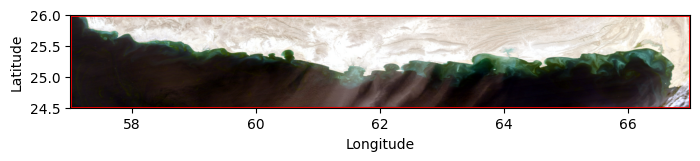

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the satellite image
image_path = "/home/sushil/Desktop/2006_1.png"  # Replace with the path to your satellite image
satellite_image = Image.open(image_path)

# Create a blank plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Plot the satellite image
plt.imshow(satellite_image, extent=[57, 67, 24.5, 26])

# Define bounding coordinates
lat_min, lat_max = 24.5, 26
lon_min, lon_max = 57, 67

# Plot the bounding box
bbox = patches.Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min, linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(bbox)

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('')

# Show the plot
#plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # Ensure equal aspect ratio
plt.savefig('01 Dec 2006_roi.png', bbox_inches='tight', dpi=300)  # Use bbox_inches='tight' to ensure all elements are included, and set DPI to 300 for high quality

plt.show()


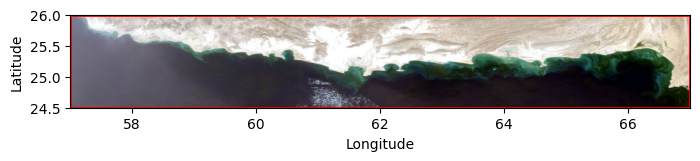

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the satellite image
image_path = "/home/sushil/jupyter/data/subset_1_of_AQUA_MODIS_20040204T085500_L2_OC_RGB.png"  # Replace with the path to your satellite image
satellite_image = Image.open(image_path)

# Create a blank plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Plot the satellite image
plt.imshow(satellite_image, extent=[57, 67, 24.5, 26])

# Define bounding coordinates
lat_min, lat_max = 24.5, 26
lon_min, lon_max = 57, 67

# Plot the bounding box
bbox = patches.Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min, linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(bbox)

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('')

# Show the plot
#plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # Ensure equal aspect ratio
plt.savefig('04 Feb 2004_roi.png', bbox_inches='tight', dpi=300)  # Use bbox_inches='tight' to ensure all elements are included, and set DPI to 300 for high quality

plt.show()


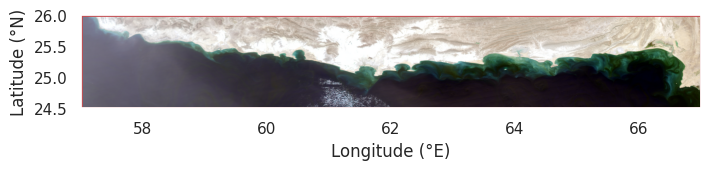

In [54]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the satellite image
image_path = "/home/sushil/jupyter/data/subset_1_of_AQUA_MODIS_20040204T085500_L2_OC_RGB.png"  # Replace with the path to your satellite image
satellite_image = Image.open(image_path)

# Create a blank plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Plot the satellite image
plt.imshow(satellite_image, extent=[57, 67, 24.5, 26])

# Define bounding coordinates
lat_min, lat_max = 24.5, 26
lon_min, lon_max = 57, 67

# Plot the bounding box
bbox = patches.Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min, linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(bbox)

# Set labels and title
plt.xlabel('Longitude (°E)')  # Change xlabel to include degrees East
plt.ylabel('Latitude (°N)')   # Change ylabel to include degrees North
plt.title('')

# Show the plot
plt.grid(False)  # Commented out to remove grids
plt.gca().set_aspect('equal', adjustable='box')  # Ensure equal aspect ratio
plt.savefig('/home/sushil/Desktop/send/final/04 Feb 2004_roi.png', bbox_inches='tight', dpi=300)  # Use bbox_inches='tight' to ensure all elements are included, and set DPI to 300 for high quality

plt.show()


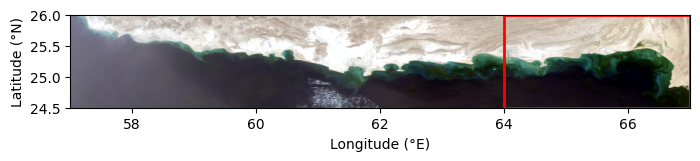

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the satellite image
image_path = '/home/sushil/jupyter/data/subset_1_of_AQUA_MODIS_20040204T085500_L2_OC_RGB.png'  # Replace with the path to your satellite image
satellite_image = Image.open(image_path)

# Create a blank plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Plot the satellite image
plt.imshow(satellite_image, extent=[57, 67, 24.5, 26])

# Define bounding coordinates for the subset
lat_min, lat_max = 24.5, 26
lon_min, lon_max = 64, 67

# Plot the bounding box for the subset
bbox_subset = patches.Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min, linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(bbox_subset)

# Set labels and title
plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')
#plt.title('04 Feb 2004')
plt.title('')

# Show the plot
plt.grid(False)
plt.gca().set_aspect('equal', adjustable='box')  # Ensure equal aspect ratio
plt.savefig('/home/sushil/nes/04 Feb 2004_sub', bbox_inches='tight', dpi=300)  # Use bbox_inches='tight' to ensure all elements are included

plt.show()


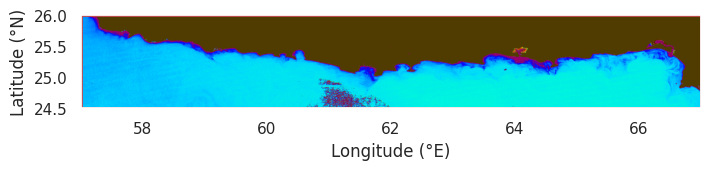

In [56]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the satellite image
image_path ="/home/sushil/jupyter/data/subset_1_of_AQUA_MODIS_20040204T085500_L2_OC_FAI_3.png"  # Replace with the path to your satellite image
satellite_image = Image.open(image_path)

# Create a blank plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Plot the satellite image
plt.imshow(satellite_image, extent=[57, 67, 24.5, 26])

# Define bounding coordinates
lat_min, lat_max = 24.5, 26
lon_min, lon_max = 57, 67

# Plot the bounding box
bbox = patches.Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min, linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(bbox)

# Set labels and title
plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')
plt.title('')

# Show the plot
plt.grid(False)
plt.gca().set_aspect('equal', adjustable='box')  # Ensure equal aspect ratio
plt.savefig('/home/sushil/Desktop/send/final/04 Feb 2004_roi2', bbox_inches='tight', dpi=300)  # Use bbox_inches='tight' to ensure all elements are included

plt.show()


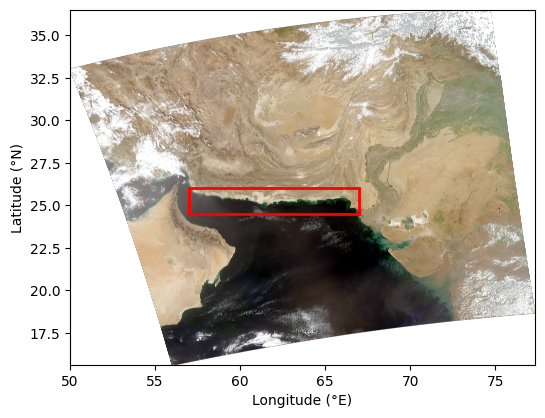

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the satellite image
image_path = '/home/sushil/jupyter/data/AQUA_MODIS_20040204T085500_L2_OC_RGB.png'  # Replace with the path to your satellite image
satellite_image = Image.open(image_path)

# Create a blank plot
plt.figure(figsize=(6, 6))  # Adjust figure size as needed

# Plot the satellite image
plt.imshow(satellite_image, extent=[50, 77.33, 15.63, 36.5])

# Define bounding coordinates for the subset
lat_min, lat_max = 24.5, 26
lon_min, lon_max = 57, 67

# Plot the bounding box for the subset
bbox_subset = patches.Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min, linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(bbox_subset)

# Set labels and title
plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')
#plt.title('04 Feb 2004')
plt.title('')

# Show the plot
plt.grid(False)
plt.gca().set_aspect('equal', adjustable='box')  # Ensure equal aspect ratio
plt.savefig('/home/sushil/nes/04 Feb 2004_main', bbox_inches='tight', dpi=300)  # Use bbox_inches='tight' to ensure all elements are included

plt.show()


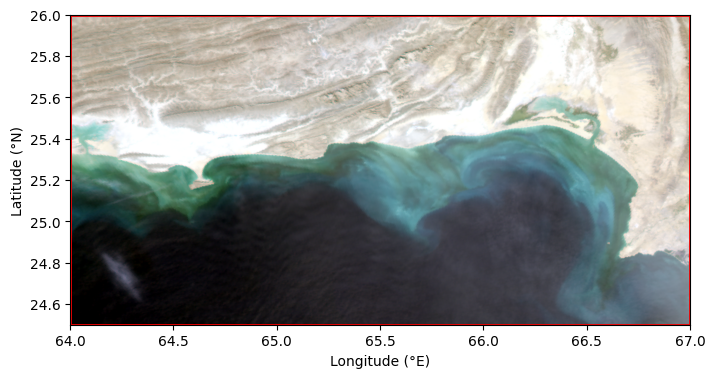

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the satellite image
image_path = "/home/sushil/nes/subset_26_of_AQUA_MODIS_20190208T084000_L2_RGB.png"  # Replace with the path to your satellite image
satellite_image = Image.open(image_path)

# Create a blank plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Plot the satellite image
plt.imshow(satellite_image, extent=[64, 67, 24.5, 26])

# Define bounding coordinates
lat_min, lat_max = 24.5, 26
lon_min, lon_max = 64, 67

# Plot the bounding box
bbox = patches.Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min, linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(bbox)

# Set labels and title
plt.xlabel('Longitude (°E)')  # Change xlabel to include degrees East
plt.ylabel('Latitude (°N)')   # Change ylabel to include degrees North
plt.title('')

# Show the plot
plt.grid(False)  # Commented out to remove grids
plt.gca().set_aspect('equal', adjustable='box')  # Ensure equal aspect ratio
plt.savefig('/home/sushil/nes/08_feb_2019_sub2R', bbox_inches='tight', dpi=300)  # Use bbox_inches='tight' to ensure all elements are included, and set DPI to 300 for high quality

plt.show()


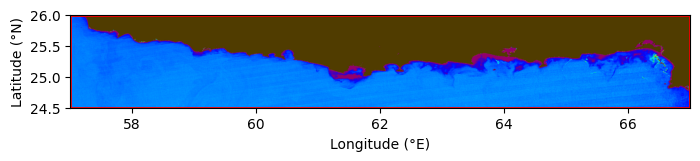

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the satellite image
image_path = "/home/sushil/Desktop/SEND_FAI.png"  # Replace with the path to your satellite image
satellite_image = Image.open(image_path)

# Create a blank plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Plot the satellite image
plt.imshow(satellite_image, extent=[57, 67, 24.5, 26])

# Define bounding coordinates
lat_min, lat_max = 24.5, 26
lon_min, lon_max = 57, 67

# Plot the bounding box
bbox = patches.Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min, linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(bbox)

# Set labels and title
plt.xlabel('Longitude (°E)')  # Change xlabel to include degrees East
plt.ylabel('Latitude (°N)')   # Change ylabel to include degrees North
plt.title('')

# Show the plot
plt.grid(False)  # Commented out to remove grids
plt.gca().set_aspect('equal', adjustable='box')  # Ensure equal aspect ratio
plt.savefig('/home/sushil/Desktop/03_DEC_2005_F', bbox_inches='tight', dpi=300)  # Use bbox_inches='tight' to ensure all elements are included, and set DPI to 300 for high quality

plt.show()


In [3]:
#SAM using reflectance at Persian Gulf

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Standard values as vectors
standard_values = np.array([
   [0.18, 0.18, 0.07, 0.03, 0.02],   # whiting
])



# Sample points
sample_points = np.array([
    [0.07, 0.07, 0.03, 0.02, 0.01],  # Pin 1 
    [0.12, 0.14, 0.06, 0.02, 0.01],  # Pin 2 
    [0.07, 0.07, 0.03, 0.01, 0.01],  # Pin 3 
    [0.08, 0.10, 0.05, 0.02, 0.01],  # Pin 4 
    [0.07, 0.09, 0.04, 0.02, 0.02],  # Pin 5 
    [0.10, 0.11, 0.05, 0.01, 0.01]   # Pin 6
])

# Calculate cosine similarity
cosine_sim_matrix = cosine_similarity(sample_points, standard_values)

# Calculate angles (in radians) for the 'whiting' feature
angles_rad = np.arccos(cosine_sim_matrix)

# Convert angles to degrees for the 'whiting' feature
angles_deg = np.degrees(angles_rad)

# Print the angles for the 'whiting' feature
for j, angle in enumerate(angles_deg[:, 0]):
    print(f"Angle for Sample point {j+1} and 'whiting' feature: {angle:.2f} degrees.")


Angle for Sample point 1 and 'whiting' feature: 4.81 degrees.
Angle for Sample point 2 and 'whiting' feature: 5.16 degrees.
Angle for Sample point 3 and 'whiting' feature: 2.12 degrees.
Angle for Sample point 4 and 'whiting' feature: 8.56 degrees.
Angle for Sample point 5 and 'whiting' feature: 9.64 degrees.
Angle for Sample point 6 and 'whiting' feature: 5.03 degrees.


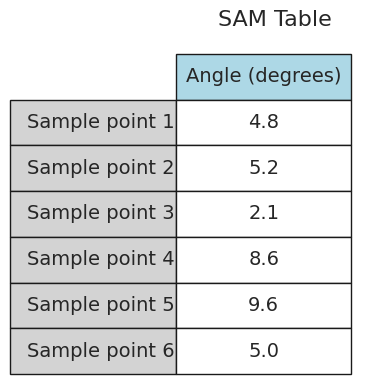

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Standard values as vectors
standard_values = np.array([
    [0.18, 0.18, 0.07, 0.03, 0.02]  # whiting
])

# Sample points
sample_points = np.array([
    [0.07, 0.07, 0.03, 0.02, 0.01],  # Pin 1 
    [0.12, 0.14, 0.06, 0.02, 0.01],  # Pin 2 
    [0.07, 0.07, 0.03, 0.01, 0.01],  # Pin 3 
    [0.08, 0.10, 0.05, 0.02, 0.01],  # Pin 4 
    [0.07, 0.09, 0.04, 0.02, 0.02],  # Pin 5 
    [0.10, 0.11, 0.05, 0.01, 0.01]   # Pin 6
])

# Calculate cosine similarity
cosine_sim_matrix = cosine_similarity(sample_points, standard_values)

# Calculate angles (in radians) for the 'whiting' feature
angles_rad = np.arccos(cosine_sim_matrix)

# Convert angles to degrees for the 'whiting' feature and round to one decimal place
angles_deg = np.round(np.degrees(angles_rad), decimals=1)

# Create a DataFrame to hold the results
df = pd.DataFrame(angles_deg, columns=['Angle (degrees)'], index=[f'Sample point {i+1}' for i in range(len(sample_points))])

# Plot the DataFrame as a table with styling
plt.figure(figsize=(8, 4))
table = plt.table(cellText=df.values,
                  colLabels=df.columns,
                  rowLabels=df.index,
                  loc='center',
                  cellLoc='center',
                  colColours=['lightblue'],  # Color for column headers
                  rowColours=['lightgrey'] * len(df),  # Alternate row colors
                  colWidths=[0.2] * len(df.columns),  # Adjust column width
                  bbox=[0, 0, 1, 1])  # Adjust table position and size

# Cell text styling
table.auto_set_font_size(False)
table.set_fontsize(12)

# Table header styling
table.auto_set_column_width([0])
table.set_fontsize(14)

# Hide axes
plt.axis('off')

# Title and layout
plt.title('SAM Table', fontsize=16, pad=20)
plt.tight_layout()

# Save the plot as an image
plt.savefig('angle_table.png', dpi=300)  # Adjust dpi for higher resolution if needed
plt.show()


/home/sushil/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/sushil/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


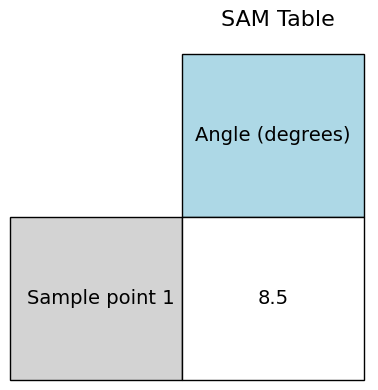

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Standard values as vectors
standard_values = np.array([
    [0.18, 0.18, 0.07, 0.03, 0.02]  # whiting
])

# Sample points
sample_points = np.array([
    [0.12, 0.15, 0.06, 0.01, 0.00],  # Pin 1 
])

# Calculate cosine similarity
cosine_sim_matrix = cosine_similarity(sample_points, standard_values)

# Calculate angles (in radians) for the 'whiting' feature
angles_rad = np.arccos(cosine_sim_matrix)

# Convert angles to degrees for the 'whiting' feature and round to one decimal place
angles_deg = np.round(np.degrees(angles_rad), decimals=1)

# Create a DataFrame to hold the results
df = pd.DataFrame(angles_deg, columns=['Angle (degrees)'], index=[f'Sample point {i+1}' for i in range(len(sample_points))])

# Plot the DataFrame as a table with styling
plt.figure(figsize=(8, 4))
table = plt.table(cellText=df.values,
                  colLabels=df.columns,
                  rowLabels=df.index,
                  loc='center',
                  cellLoc='center',
                  colColours=['lightblue'],  # Color for column headers
                  rowColours=['lightgrey'] * len(df),  # Alternate row colors
                  colWidths=[0.2] * len(df.columns),  # Adjust column width
                  bbox=[0, 0, 1, 1])  # Adjust table position and size

# Cell text styling
table.auto_set_font_size(False)
table.set_fontsize(12)

# Table header styling
table.auto_set_column_width([0])
table.set_fontsize(14)

# Hide axes
plt.axis('off')

# Title and layout
plt.title('SAM Table', fontsize=16, pad=20)
plt.tight_layout()

# Save the plot as an image
plt.savefig('angle_table.png', dpi=300)  # Adjust dpi for higher resolution if needed
plt.show()
